In [1]:
%matplotlib inline

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
wowTokenAppendedData = []
regions = ['NA', 'EU', 'CN', 'KR', 'TW']

for entry in os.scandir('./input/wowtoken'):
    if entry.is_file():
        wowTokenEntry = pd.read_csv(entry.path)
        wowTokenEntry['region'] = (os.path.splitext(entry.name)[0])
        wowTokenEntry['date'] = pd.to_datetime(wowTokenEntry['date'])
        wowTokenAppendedData.append(wowTokenEntry)
        
data = pd.concat(wowTokenAppendedData)

In [4]:
data.pivot(columns='region', values='price').describe()

region,CN,EU,KR,NA,TW
count,6835.000000,7744.000000,7642.000000,7886.000000,7468.000000
mean,242416.955377,164289.345687,271204.557969,95573.815876,260885.958356
std,168907.809419,101425.233611,98936.313849,64075.637750,104487.473796
min,48604.000000,30352.000000,121305.000000,18296.000000,114619.000000
25%,83650.000000,68769.250000,179645.500000,37004.250000,174211.000000
50%,215554.000000,171327.000000,285099.500000,89460.500000,213519.000000
75%,400670.000000,256468.750000,350899.250000,163553.250000,335554.500000
max,586090.000000,401827.000000,595930.000000,238572.000000,501220.000000


In [5]:
data2018 = data.loc[data['date'].dt.year >= 2018].reset_index()
data2018.pivot(columns='region', values='price').describe()

region,CN,EU,KR,NA,TW
count,1983.000000,2076.000000,2088.000000,2085.000000,2085.000000
mean,414124.769037,272073.894990,365853.373084,165006.325659,381305.507434
std,129721.911793,68360.274879,76882.410805,41141.510822,75199.125368
min,206304.000000,168106.000000,269461.000000,100993.000000,250412.000000
25%,229674.000000,184120.000000,298436.000000,111341.000000,284082.000000
50%,496259.000000,298415.500000,322257.500000,182392.000000,413693.000000
75%,507332.500000,336512.500000,441929.750000,199718.000000,441348.000000
max,586090.000000,401827.000000,595930.000000,238572.000000,501220.000000


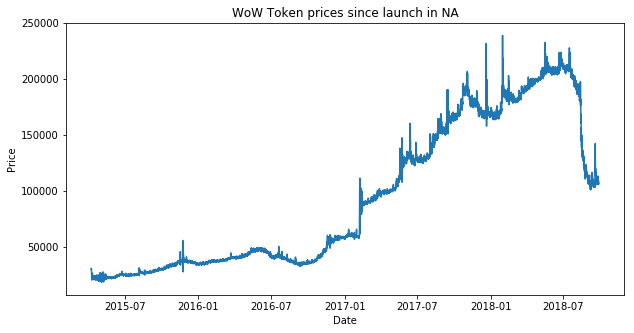

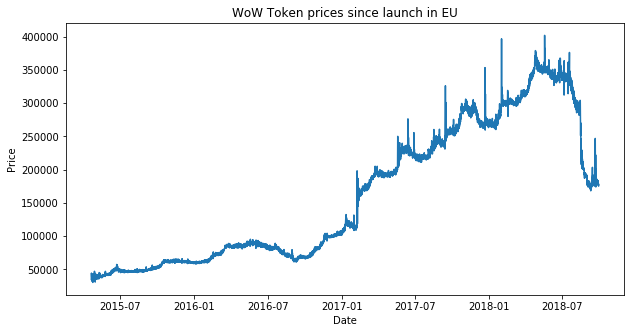

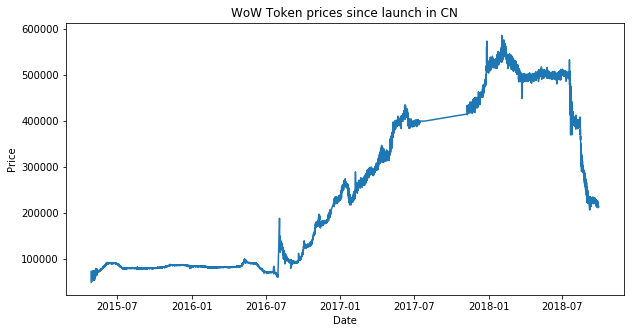

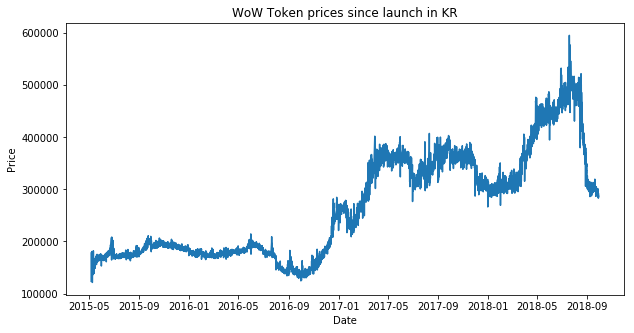

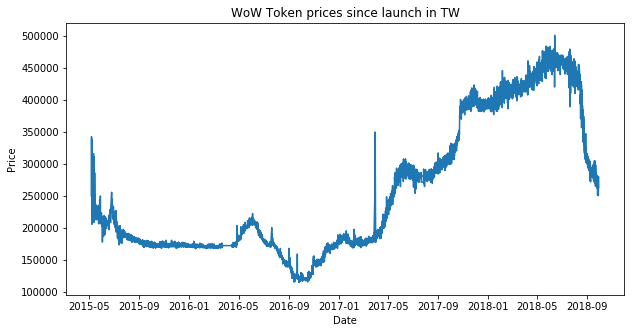

In [6]:
for region in regions:
    plt.figure(figsize=(10,5))
    plt.plot(data.loc[data['region'] == region, 'date'], data.loc[data['region'] == region, 'price'])
    plt.title(f'WoW Token prices since launch in {region}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

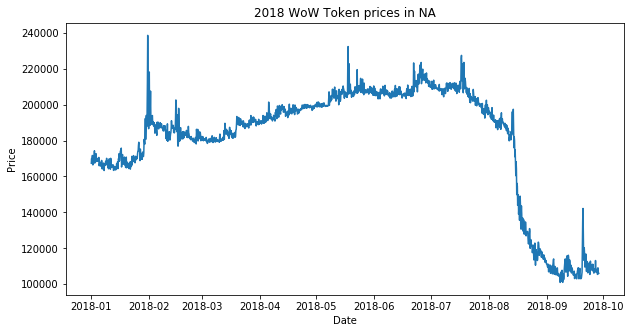

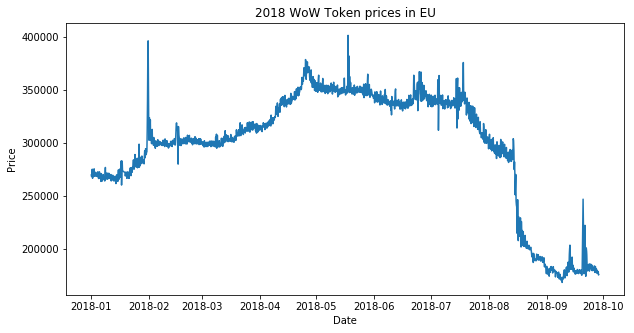

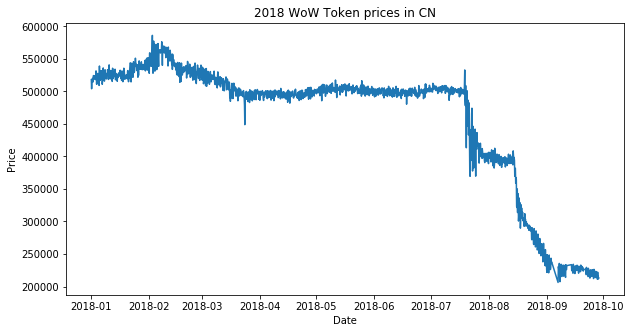

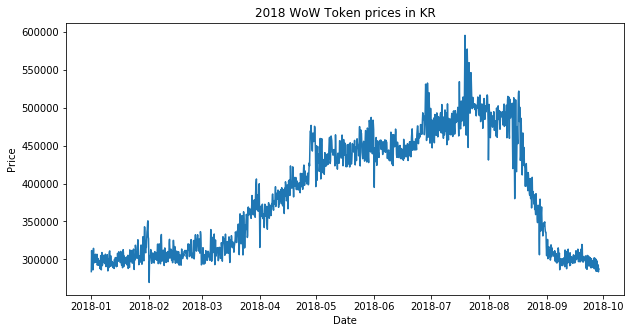

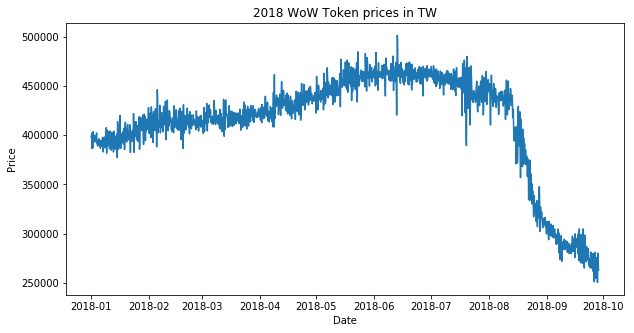

In [7]:
for region in regions:
    plt.figure(figsize=(10,5))
    plt.plot(data2018.loc[data2018['region'] == region, 'date'], data2018.loc[data2018['region'] == region, 'price'])
    plt.title(f'2018 WoW Token prices in {region}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

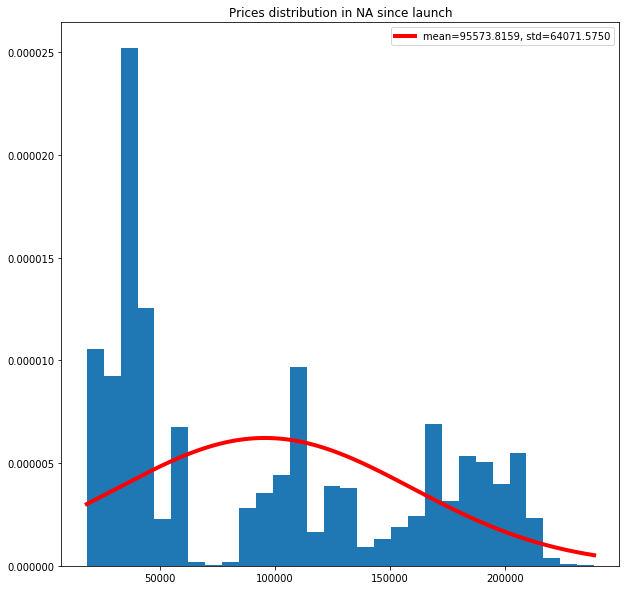

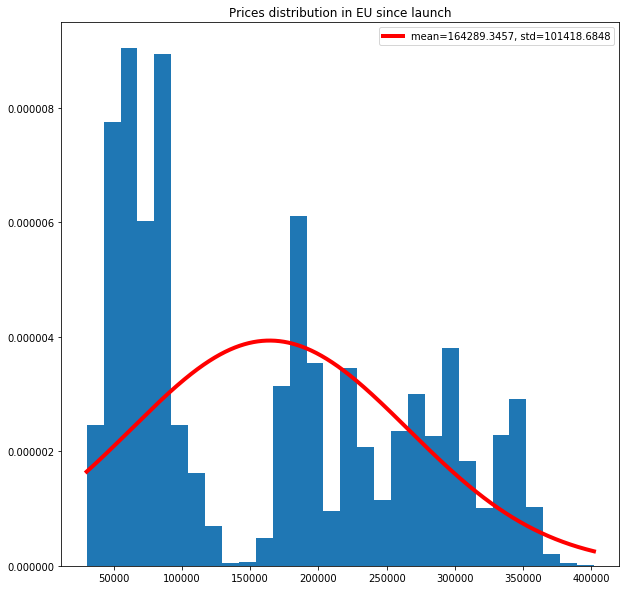

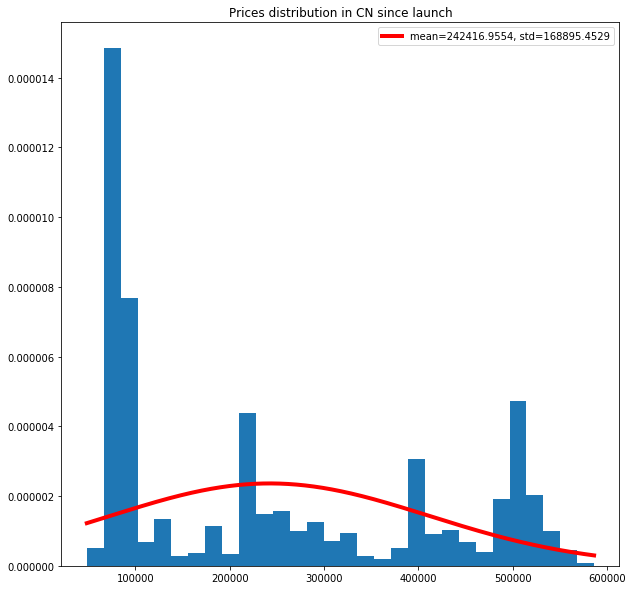

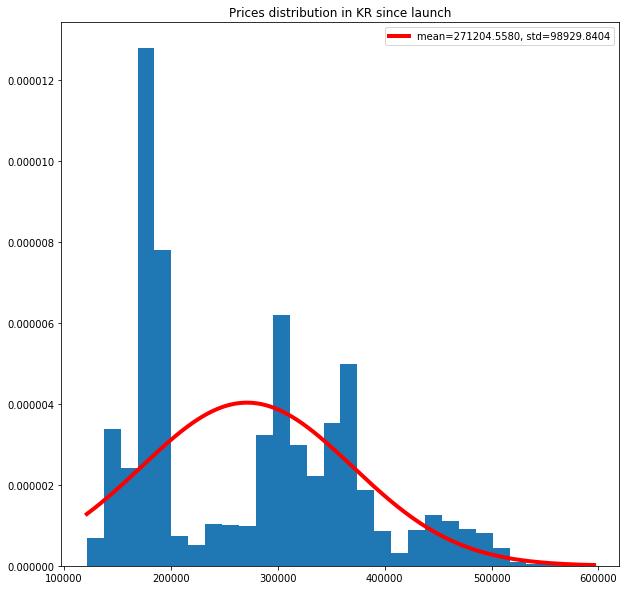

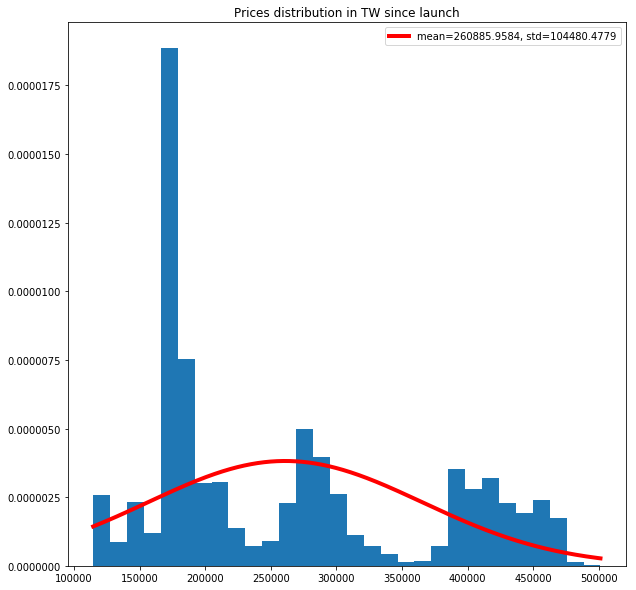

In [8]:
for region in regions:
    prices = data.loc[data['region'] == region, 'price']
    
    x = np.linspace(prices.min(), prices.max(), len(prices))
    loc, scale = stats.norm.fit(prices)
    density = stats.norm.pdf(x, loc=loc, scale=scale)

    plt.figure(figsize=(10, 10))
    plt.title(f'Prices distribution in {region} since launch')
    plt.hist(prices, bins=30, normed=True)
    plt.plot(x, density, 'r-', label='mean=%.4f, std=%.4f' %(loc, scale), linewidth=4)
    plt.legend(loc='best')
    plt.show()

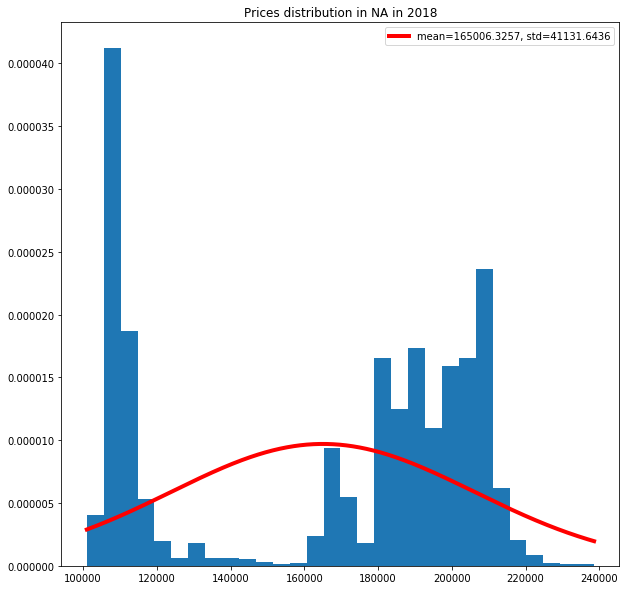

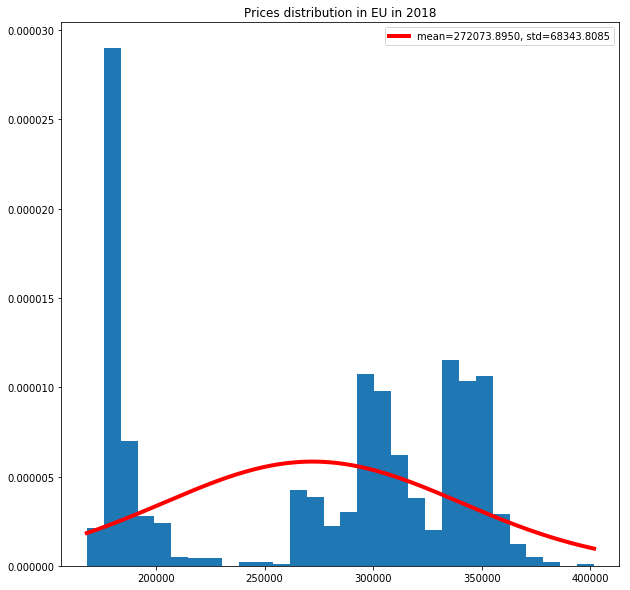

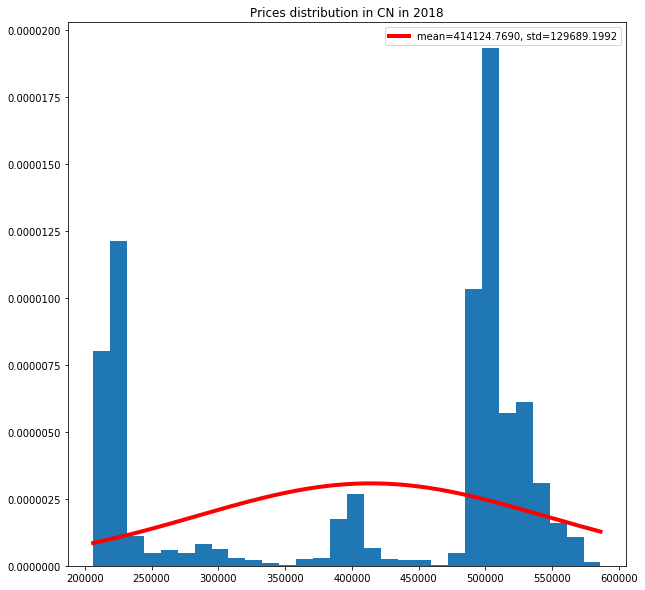

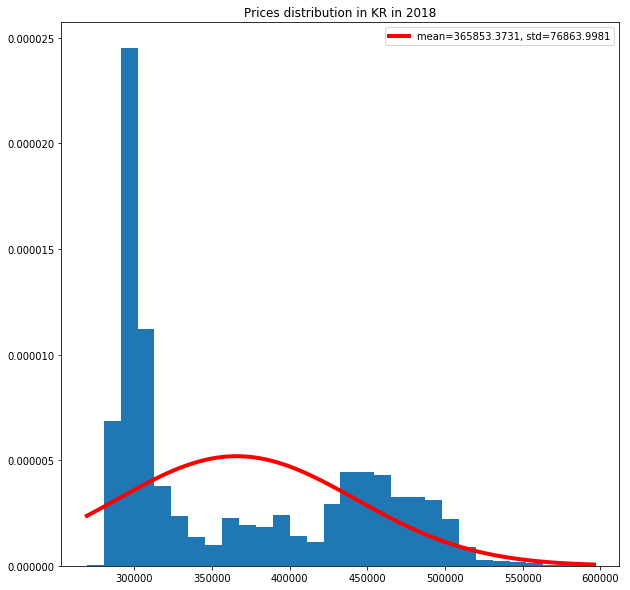

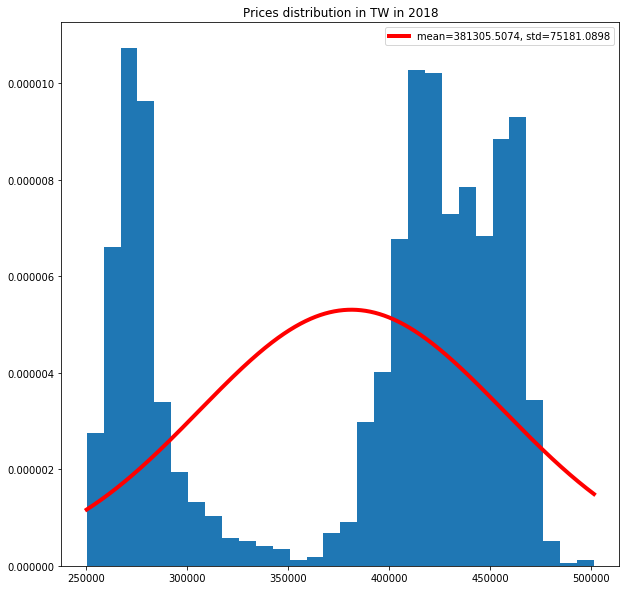

In [9]:
for region in regions:
    prices = data2018.loc[data2018['region'] == region, 'price']
    x = np.linspace(prices.min(), prices.max(), len(prices))

    loc, scale = stats.norm.fit(prices)
    density = stats.norm.pdf(x, loc=loc, scale=scale)
    label = 'mean=%.4f, std=%.4f' % (loc, scale)

    plt.figure(figsize=(10, 10))
    plt.title(f'Prices distribution in {region} in 2018')
    plt.hist(prices, bins=30, normed=True)
    plt.plot(x, density, 'r-', label='mean=%.4f, std=%.4f' %(loc, scale), linewidth=4)
    plt.legend(loc='best')
    plt.show()

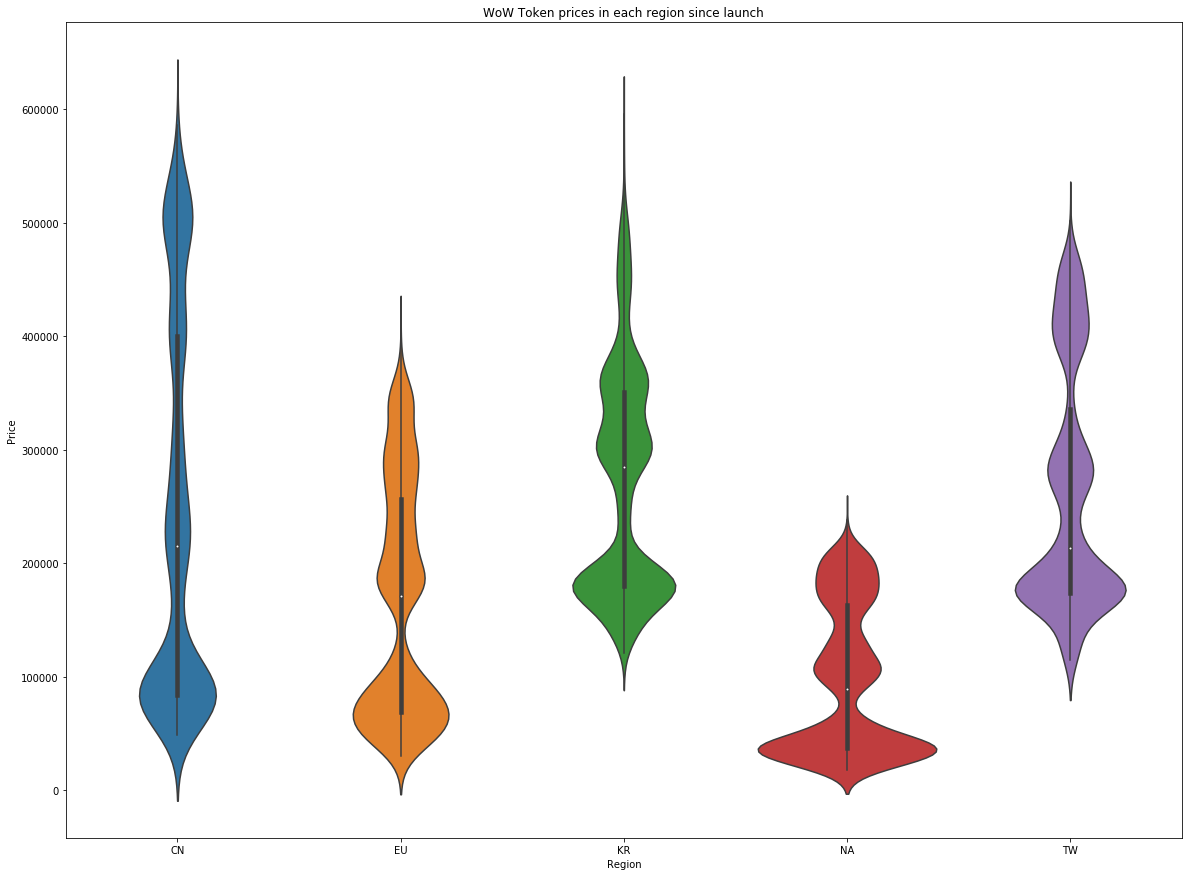

In [10]:
plt.figure(figsize=(20,15))
sns.violinplot(data=data.pivot(columns='region', values='price'))
plt.title('WoW Token prices in each region since launch')
plt.xlabel('Region')
plt.ylabel('Price')
plt.show()

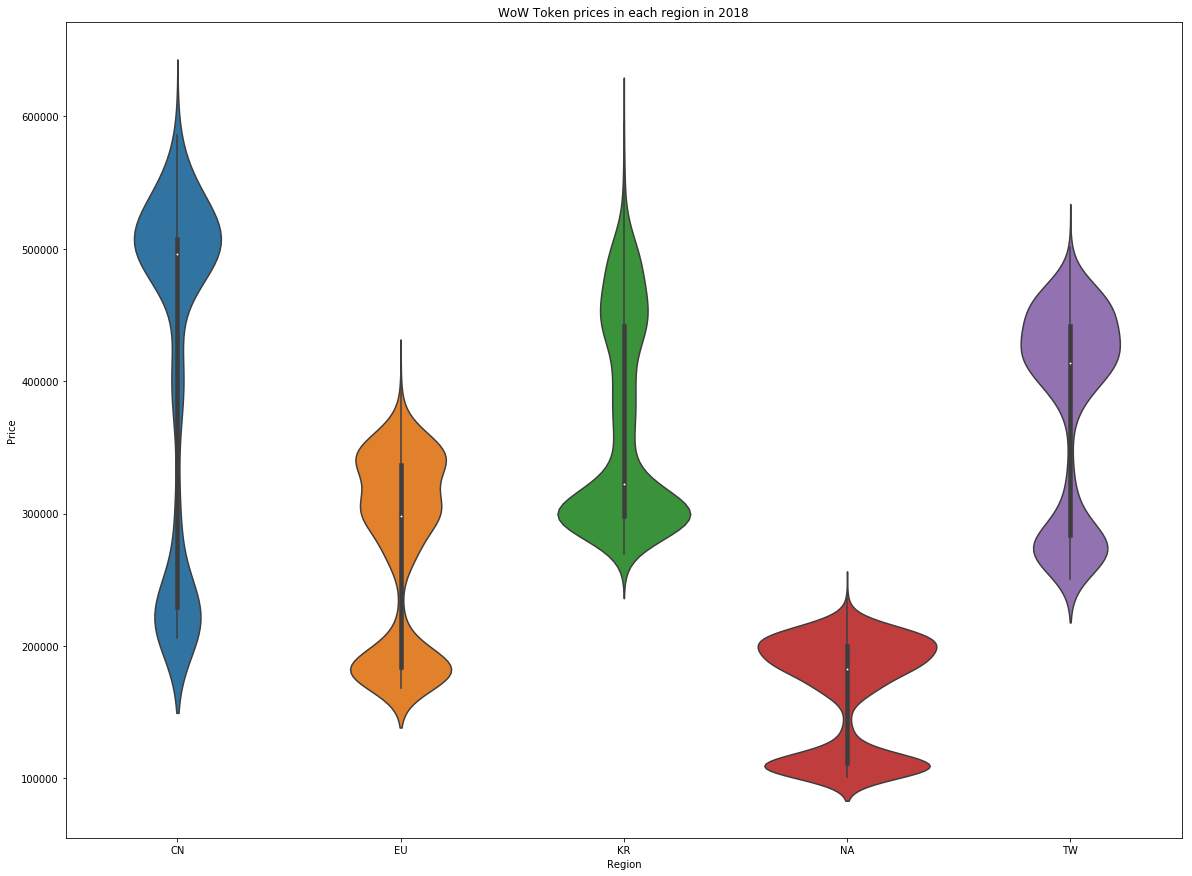

In [11]:
plt.figure(figsize=(20,15))
sns.violinplot(data=data2018.pivot(columns='region', values='price'))
plt.title('WoW Token prices in each region in 2018')
plt.xlabel('Region')
plt.ylabel('Price')
plt.show()

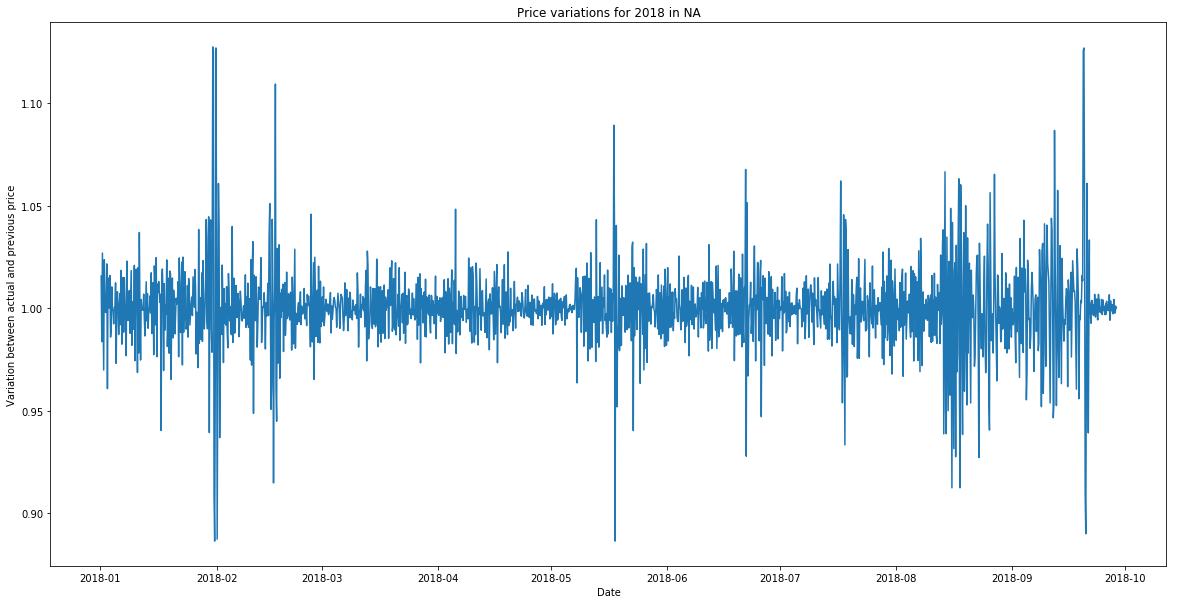

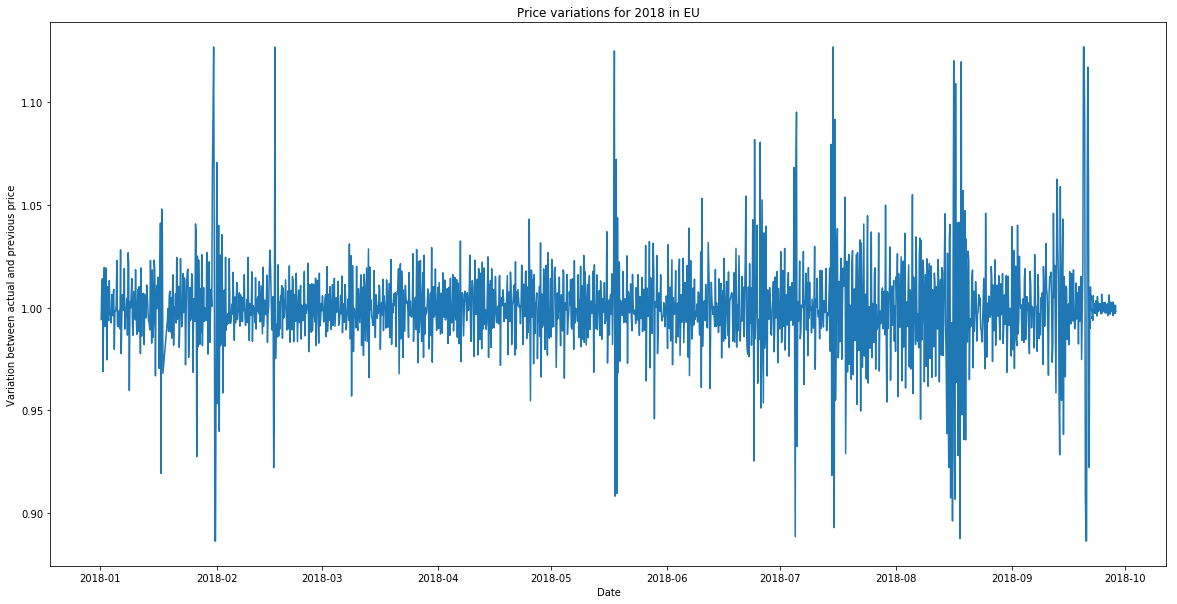

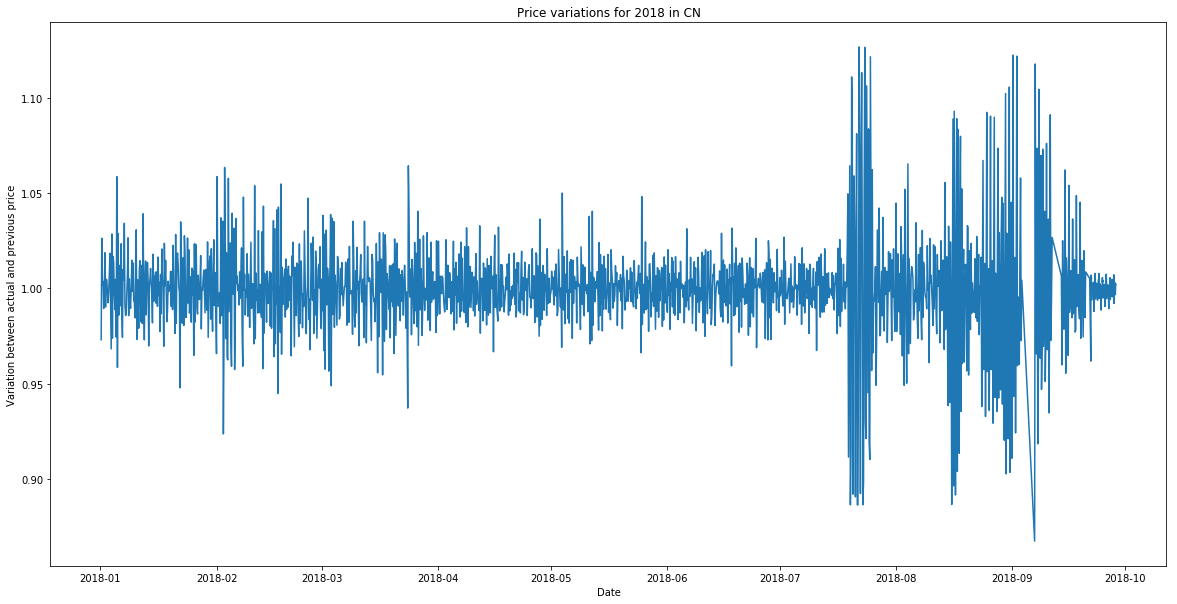

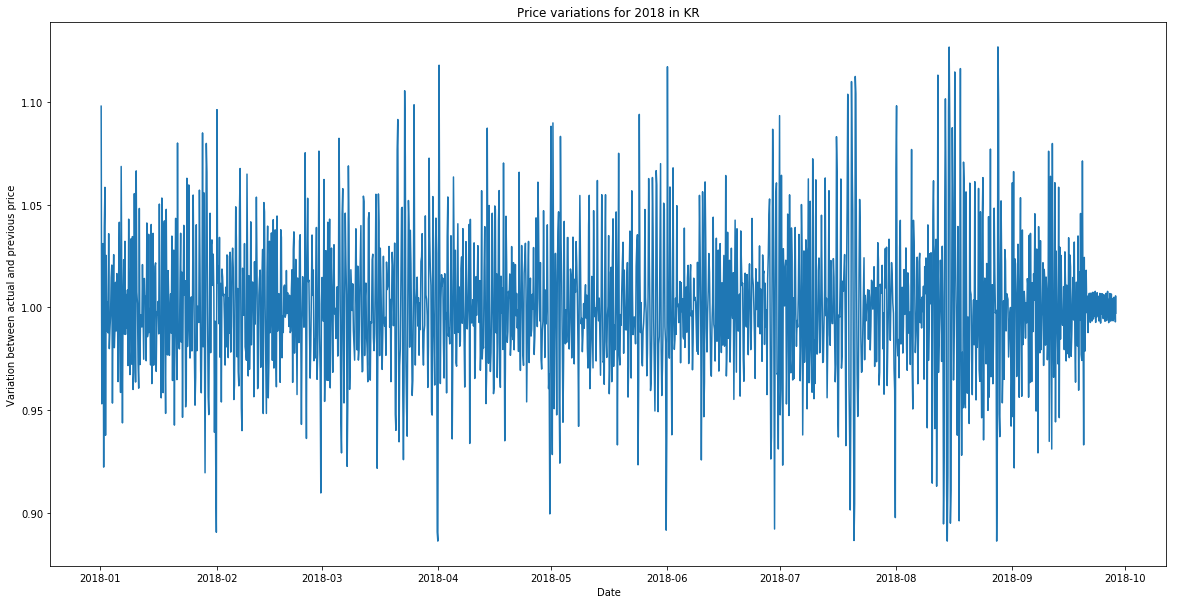

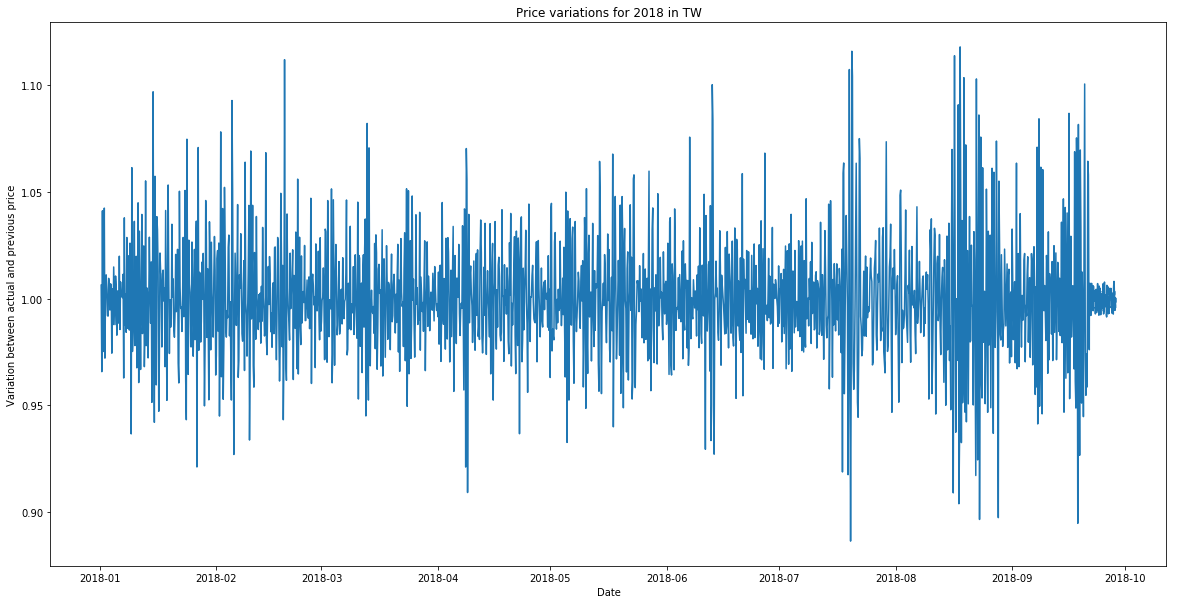

In [12]:
for region in regions:
    prices = data2018.loc[data2018['region'] == region, 'price'].reset_index(drop=True)
    
    priceVariations = []
    
    for index in range(len(prices)):
        try:
            priceVariations.append(prices[index] / prices[index-1])
        except:
            priceVariations.append(np.nan)

    plt.figure(figsize=(20,10))
    plt.plot(data2018.loc[data2018['region'] == region, 'date'], priceVariations)
    plt.title(f'Price variations for 2018 in {region}')
    plt.xlabel('Date')
    plt.ylabel('Variation between actual and previous price')
    plt.show()

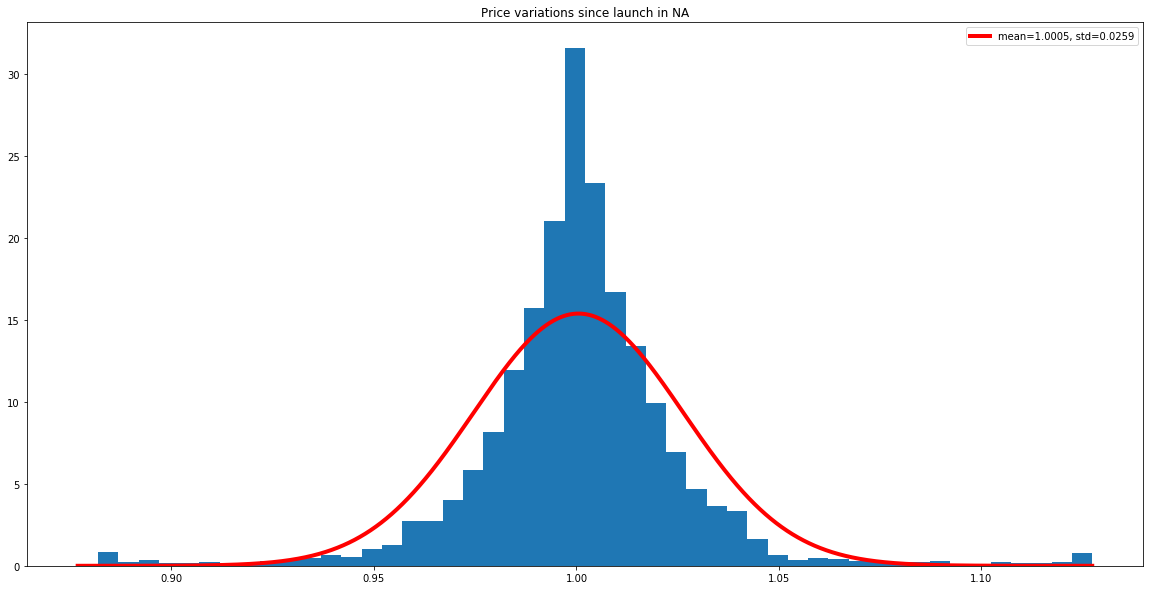

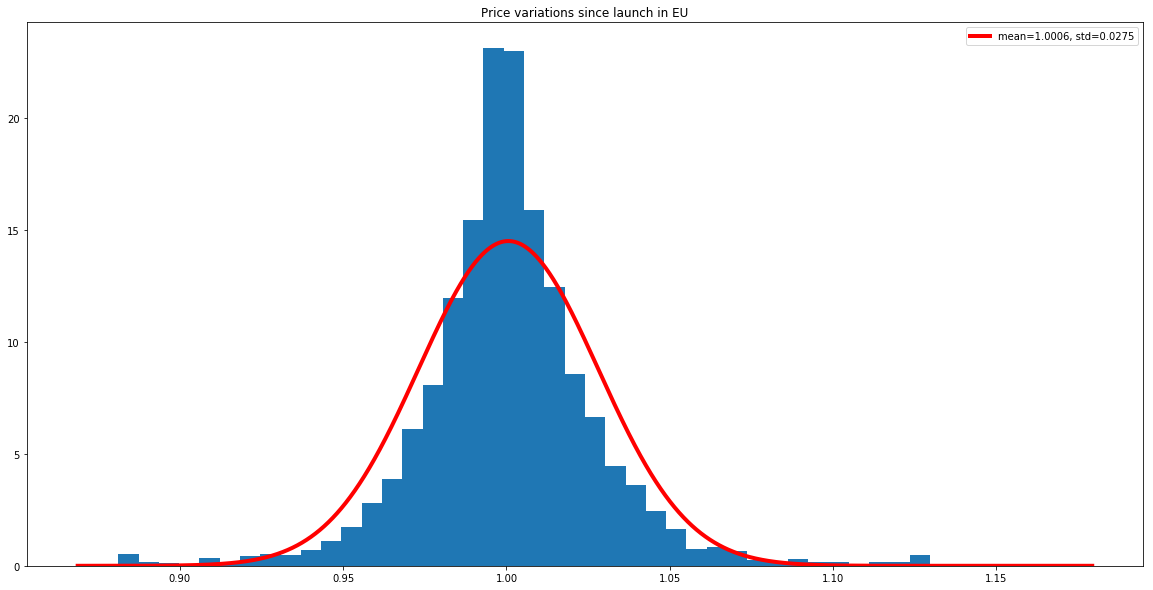

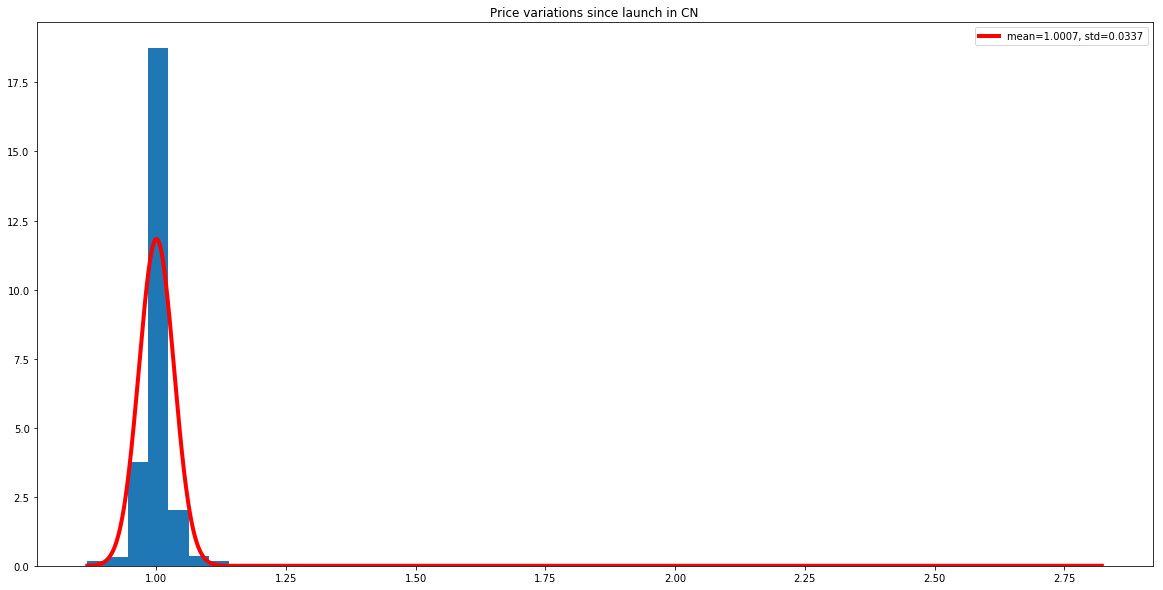

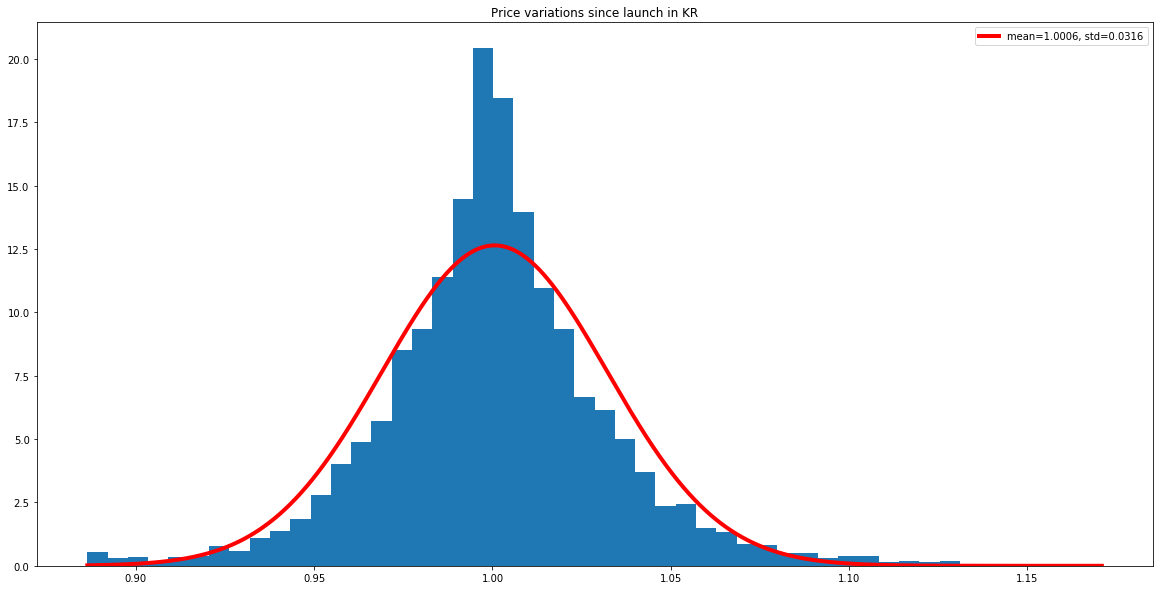

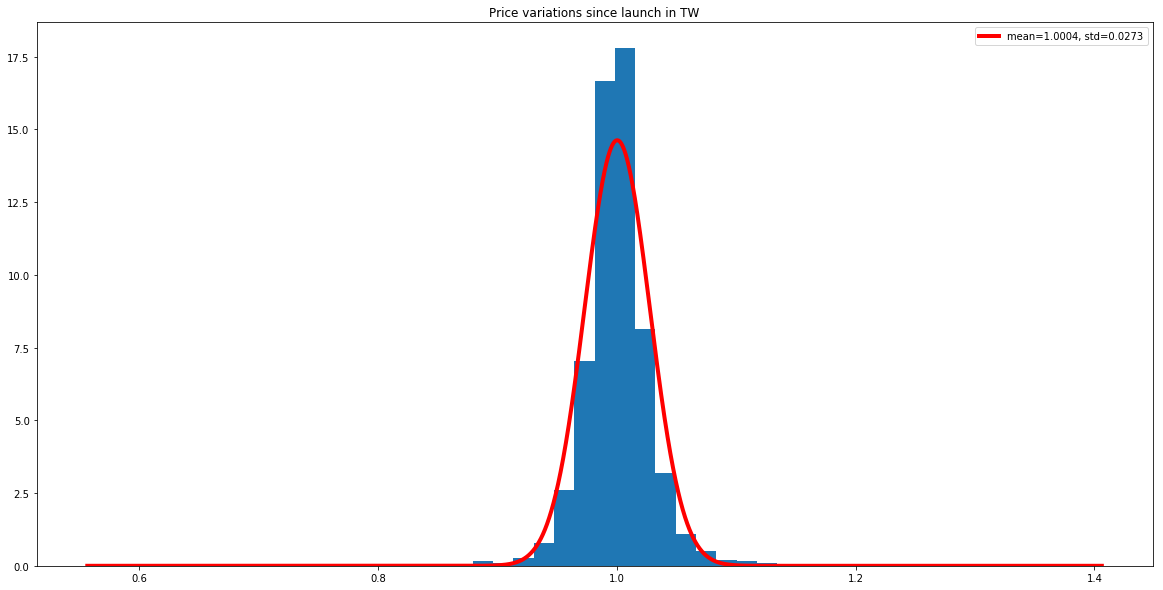

In [13]:
for region in regions:
    prices = data.loc[data['region'] == region, 'price'].reset_index(drop=True)
    
    priceVariations = []
    
    for index in range(len(prices)):
        try:
            priceVariations.append(prices[index] / prices[index-1])
        except:
            priceVariations.append(np.nan)

    priceVariations = np.array(priceVariations[1:])
            
    x = np.linspace(priceVariations.min(), priceVariations.max(), len(priceVariations))
    loc, scale = stats.norm.fit(priceVariations)
    density = stats.norm.pdf(x, loc=loc, scale=scale)
    
    plt.figure(figsize=(20,10))
    plt.hist(priceVariations, bins=50, normed=True)
    plt.plot(x, density, 'r-', label='mean=%.4f, std=%.4f' %(loc, scale), linewidth=4)
    plt.legend(loc='best')
    plt.title(f'Price variations since launch in {region}')
    plt.show()

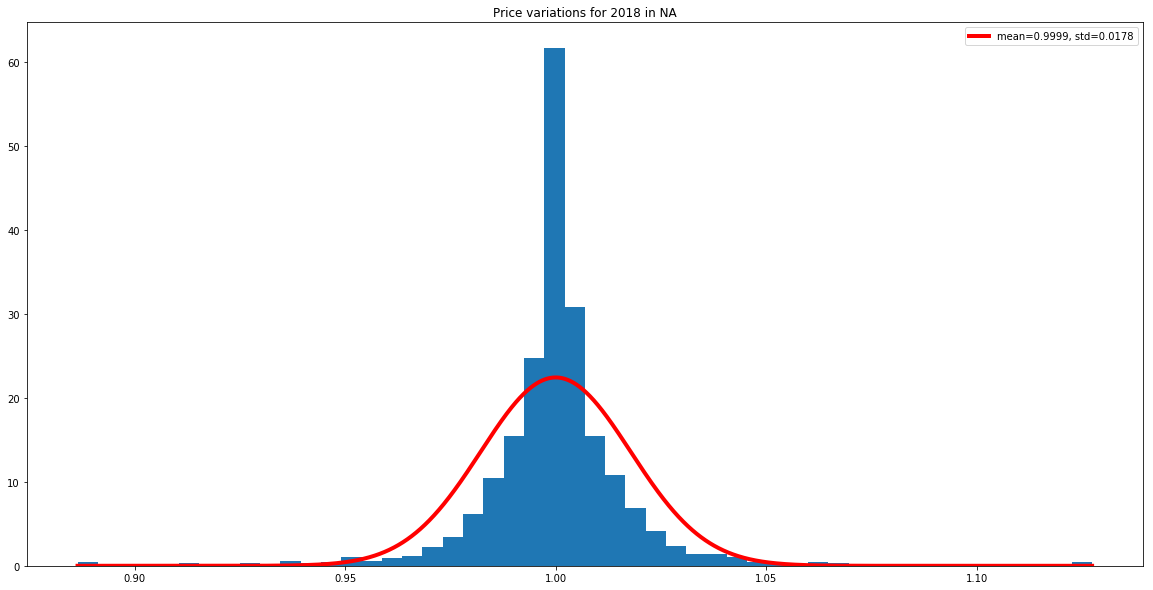

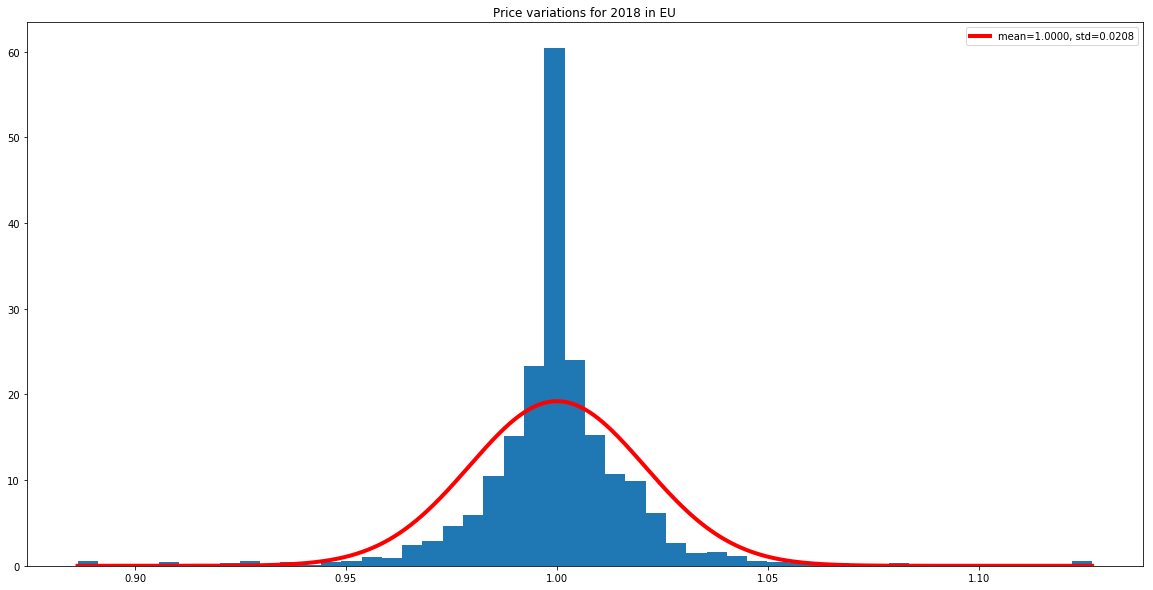

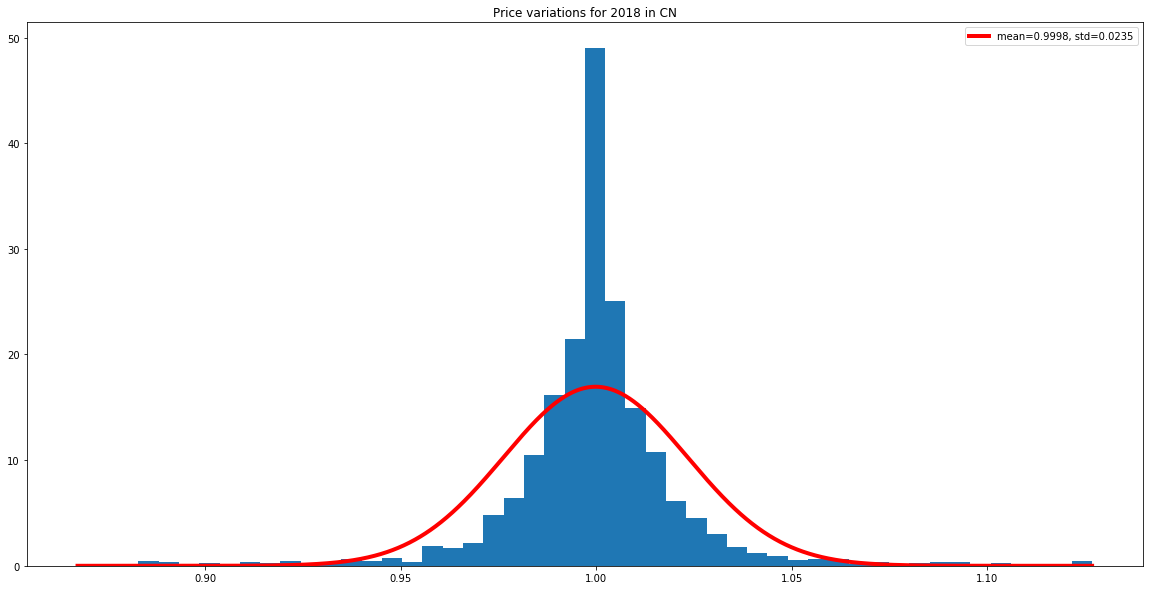

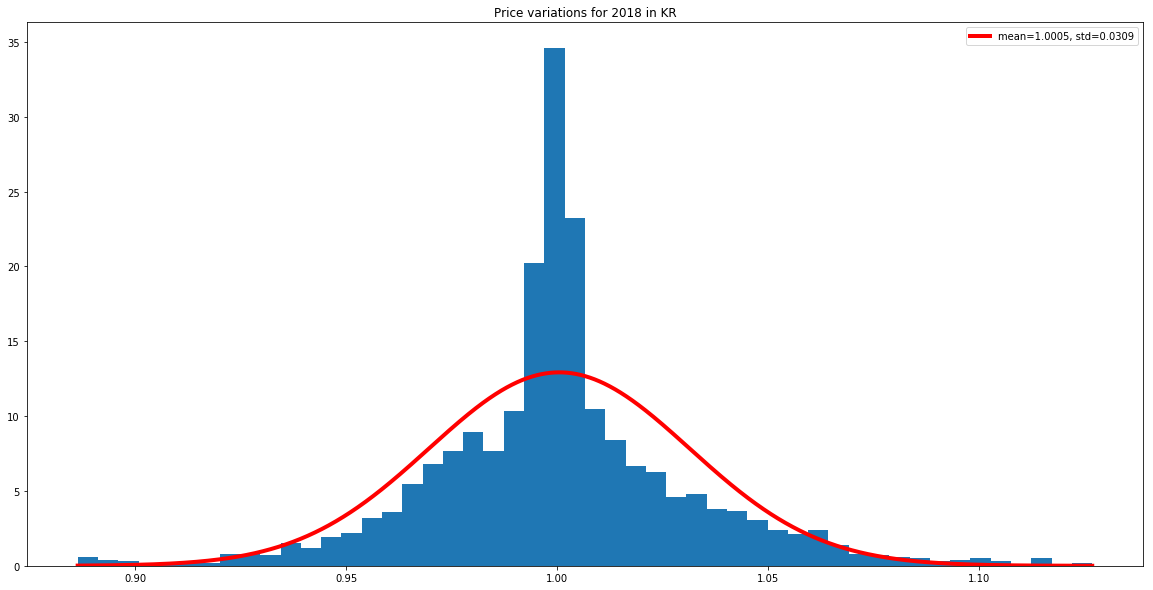

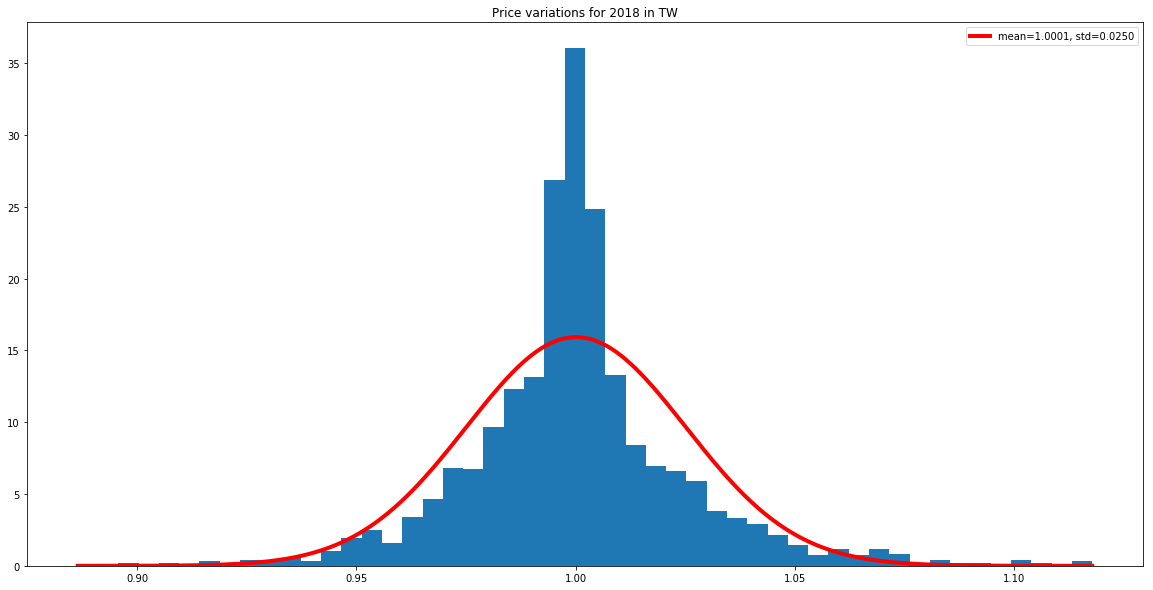

In [14]:
for region in regions:
    prices = data2018.loc[data2018['region'] == region, 'price'].reset_index(drop=True)
    
    priceVariations = []
    
    for index in range(len(prices)):
        try:
            priceVariations.append(prices[index] / prices[index-1])
        except:
            priceVariations.append(np.nan)

    priceVariations = np.array(priceVariations[1:])
            
    x = np.linspace(priceVariations.min(), priceVariations.max(), len(priceVariations))
    loc, scale = stats.norm.fit(priceVariations)
    density = stats.norm.pdf(x, loc=loc, scale=scale)
    
    plt.figure(figsize=(20,10))
    plt.hist(priceVariations, bins=50, normed=True)
    plt.plot(x, density, 'r-', label='mean=%.4f, std=%.4f' %(loc, scale), linewidth=4)
    plt.legend(loc='best')
    plt.title(f'Price variations for 2018 in {region}')
    plt.show()

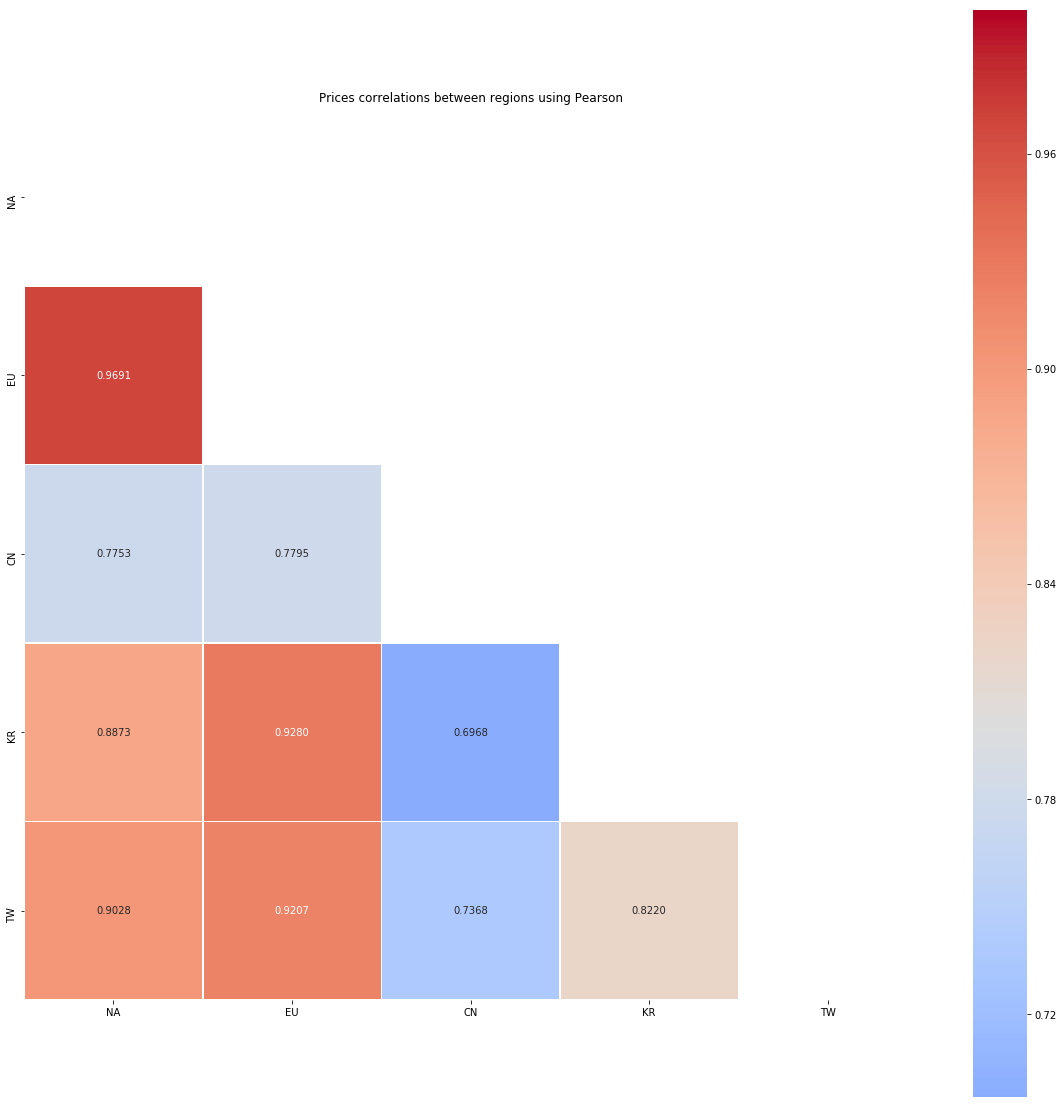

In [15]:
corr = pd.DataFrame()
 
for region in regions:
    corr[f'{region}'] = data.loc[data['region'] == region, 'price']
    
corr = corr.corr(method='pearson')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt = '.4f', mask=mask, center=0.8, square=True, linewidths=.5)
plt.title('Prices correlations between regions using Pearson')
plt.show()

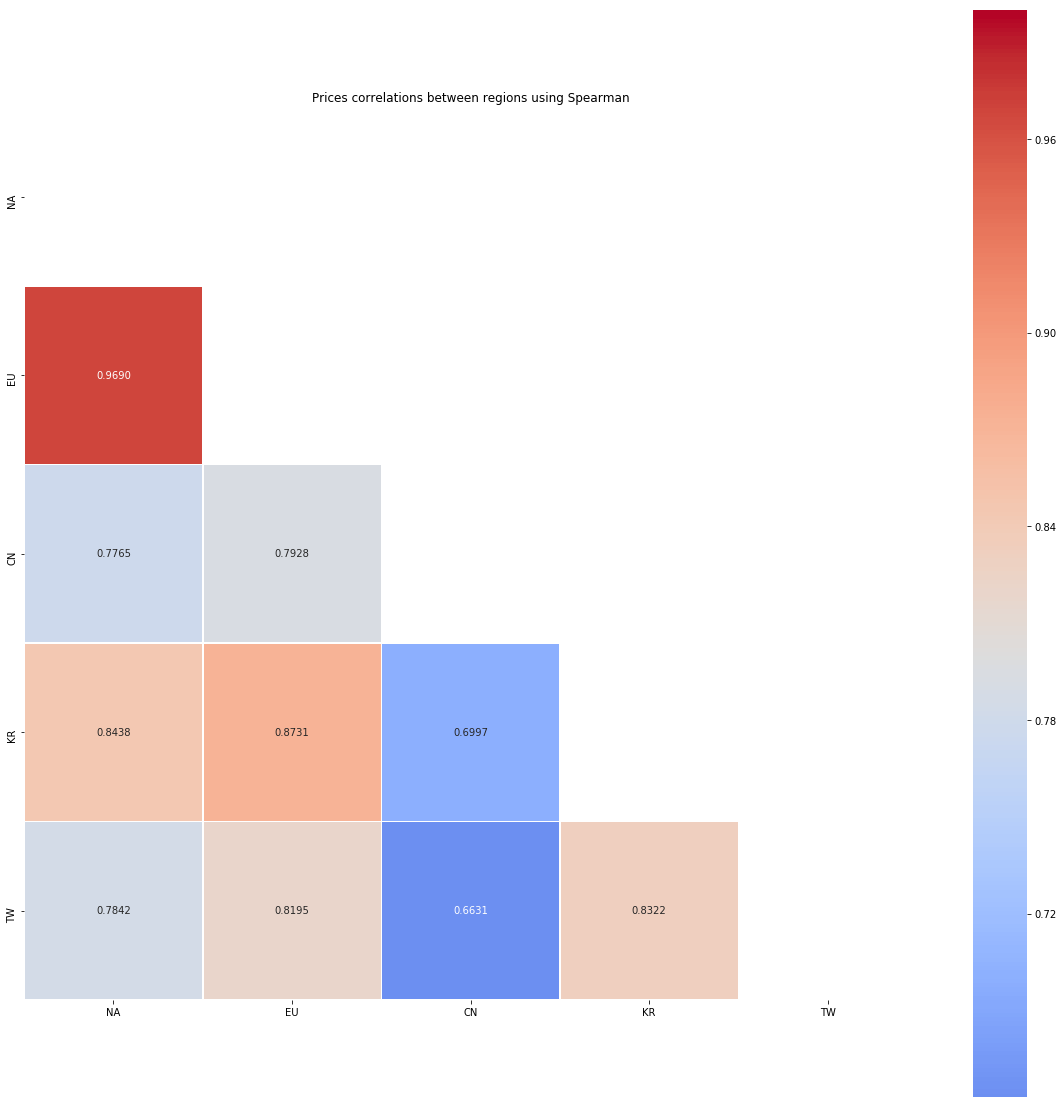

In [16]:
corr = pd.DataFrame()
 
for region in regions:
    corr[f'{region}'] = data.loc[data['region'] == region, 'price']
    
corr = corr.corr(method='spearman')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt = '.4f', mask=mask, center=0.8, square=True, linewidths=.5)
plt.title('Prices correlations between regions using Spearman')
plt.show()

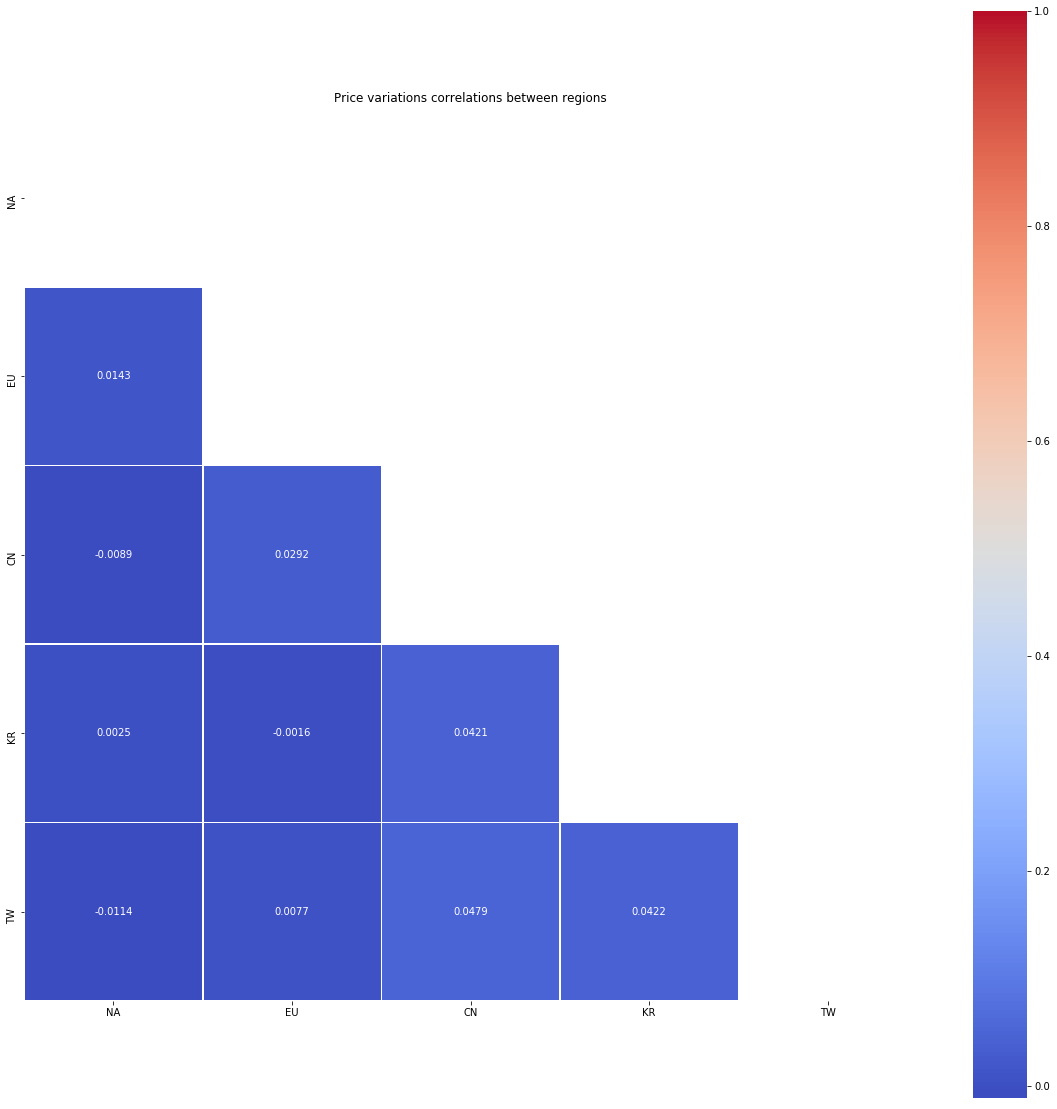

In [17]:
corr = pd.DataFrame()
 
for region in regions:
    prices = data.loc[data['region'] == region, 'price']
    priceVariations = []
    for index in range(len(prices)):
        try:
            priceVariations.append(prices[index] / prices[index-1])
        except:
            priceVariations.append(np.nan)

    corr[f'{region}'] = pd.Series(priceVariations[1:])
    
corr = corr.corr(method='pearson')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt = '.4f', mask=mask, center=0.5, square=True, linewidths=.5)
plt.title('Price variations correlations between regions')
plt.show()

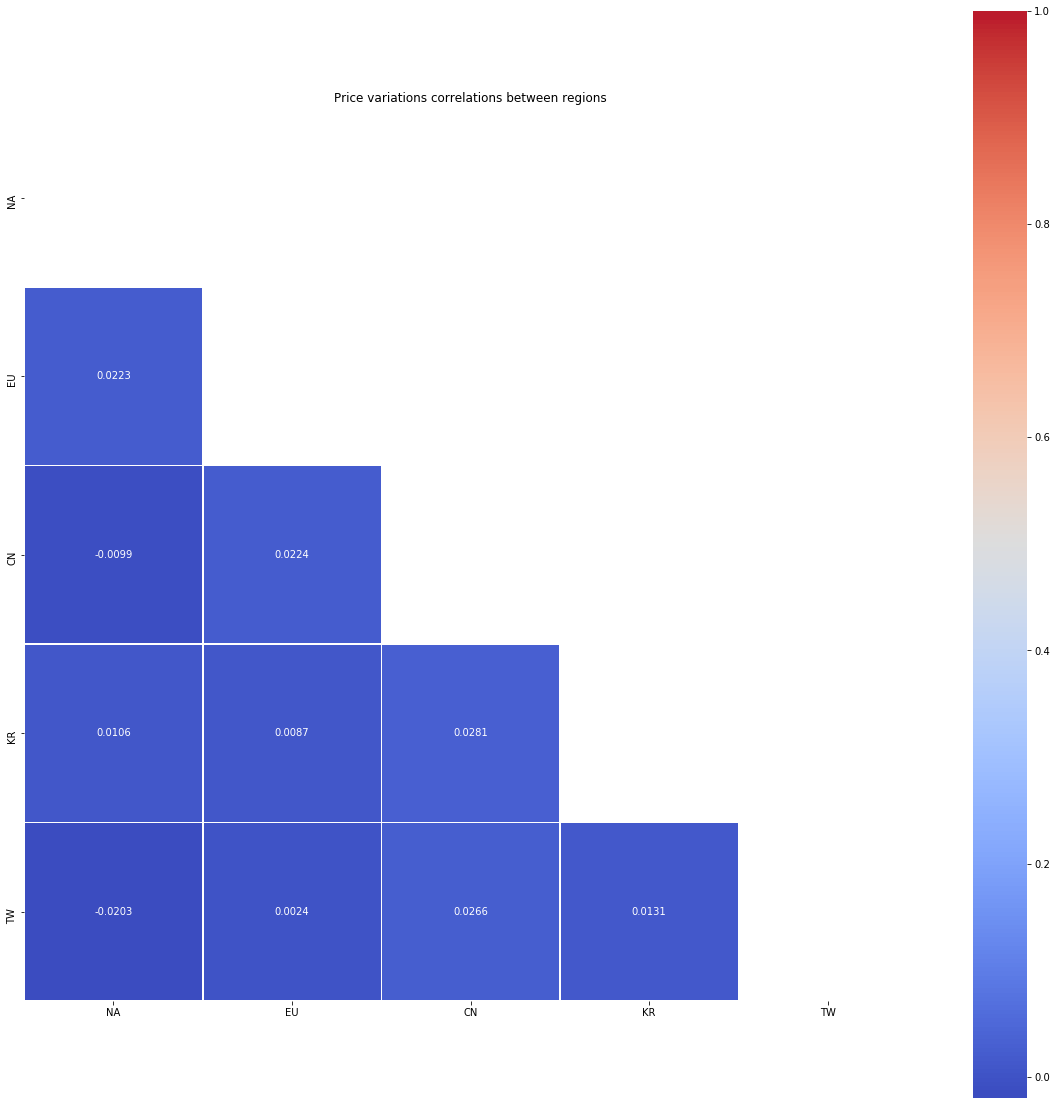

In [18]:
corr = pd.DataFrame()
 
for region in regions:
    prices = data.loc[data['region'] == region, 'price']
    priceVariations = []
    for index in range(len(prices)):
        try:
            priceVariations.append(prices[index] / prices[index-1])
        except:
            priceVariations.append(np.nan)

    corr[f'{region}'] = pd.Series(priceVariations[1:])
    
corr = corr.corr(method='spearman')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt = '.4f', mask=mask, center=0.5, square=True, linewidths=.5)
plt.title('Price variations correlations between regions')
plt.show()